In [44]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import seaborn as sns


# load data
file_path = 'Submited version.csv'  #
data = pd.read_csv(file_path)

# select canada
canada_data = data[data['Economies'] == 'Canada'][
    ['Year', 'Global Innovation Index', 'Institutions', 'Human capital and research',
     'Infrastructure', 'Market sophistication', 'Business sophistication',
     'Knowledge and technology outputs', 'Creative outputs']
].dropna()

# set index
canada_data.set_index('Year', inplace=True)

# normalize
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(canada_data)

normalized_data = pd.DataFrame(
    normalized_features, columns=canada_data.columns, index=canada_data.index
)

target = normalized_data['Global Innovation Index']
exogenous = normalized_data.drop(columns=['Global Innovation Index'])



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5.785, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7.118, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5.533, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-5.119, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-7.319, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-5.584, Time=0.31 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-3.786, Time=0.22 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 2.373 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   12
Model:               SARIMAX(1

e:\an\envs\ece1786\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
e:\an\envs\ece1786\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


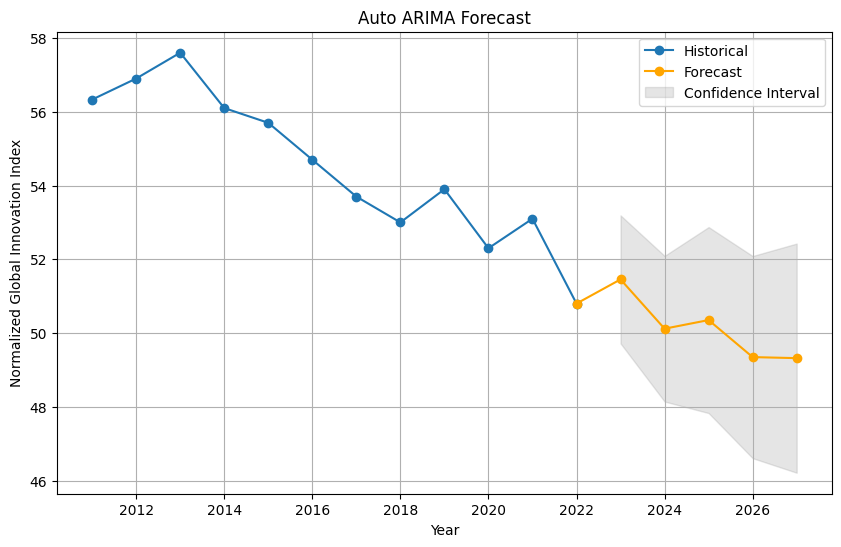

In [45]:
# auto ARIMA
arima_model = auto_arima(
    target,
    exogenous=exogenous, 
    trace=True,
    suppress_warnings=True,
    stepwise=True
)
# summary
print(arima_model.summary())

# auto fit
arima_model.fit(canada_data['Global Innovation Index'])

# forecast
n_periods = 5  
forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)
forecast_index = range(canada_data.index[-1] + 1, canada_data.index[-1] + n_periods + 1)

forecast_extended = [canada_data['Global Innovation Index'].iloc[-1]] + forecast.tolist()
forecast_index_extended = [canada_data.index[-1]] + list(forecast_index)

# visualize
plt.figure(figsize=(10, 6))
plt.plot(canada_data.index, canada_data['Global Innovation Index'], label='Historical', marker='o')
plt.plot(forecast_index_extended, forecast_extended, label='Forecast', marker='o', color='orange')
plt.fill_between(
    forecast_index, conf_int[:, 0], conf_int[:, 1],
    color='gray', alpha=0.2, label='Confidence Interval'
)
plt.title('Auto ARIMA Forecast')
plt.xlabel('Year')
plt.ylabel('Normalized Global Innovation Index')
plt.legend()
plt.grid(True)
plt.show()


In [46]:
columns_to_analyze = [
    'Institutions', 'Human capital and research', 'Infrastructure',
    'Market sophistication', 'Business sophistication',
    'Knowledge and technology outputs', 'Creative outputs',
    'Global Innovation Index'
]

correlation_data = data[data['Economies'] == 'Canada'][columns_to_analyze].dropna()

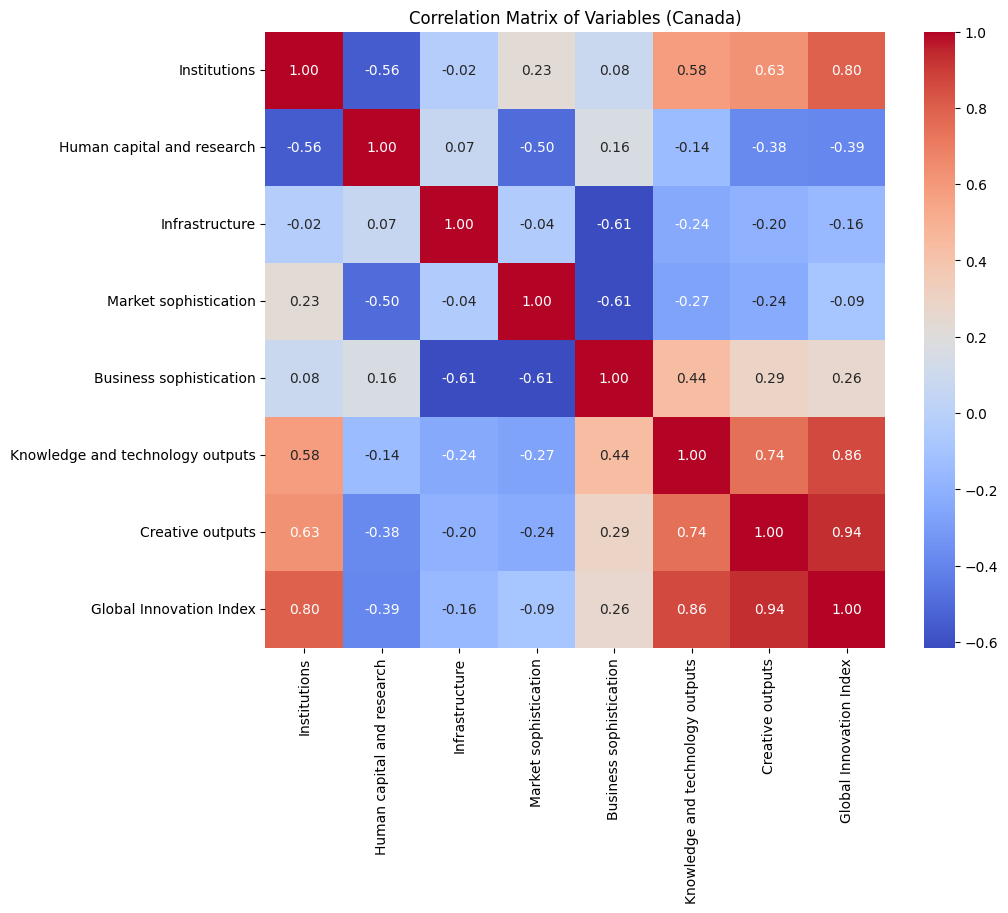

In [49]:

correlation_matrix = correlation_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Variables (Canada)")
plt.show()

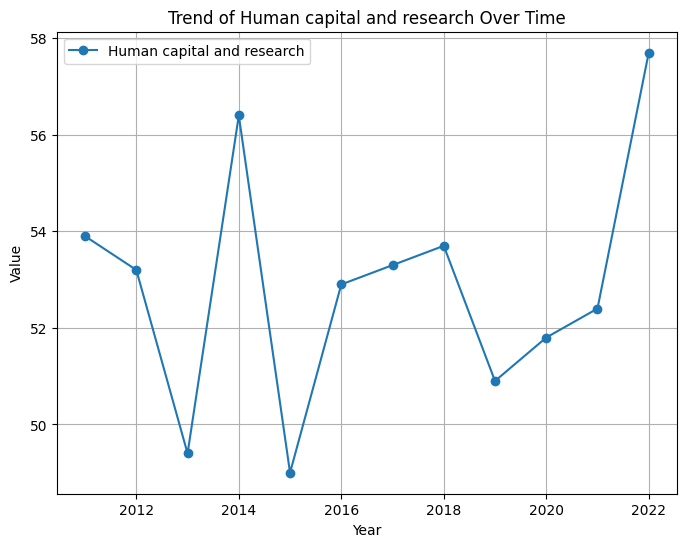

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(canada_data.index, canada_data['Human capital and research'], label='Human capital and research', marker='o')
plt.title('Trend of Human capital and research Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()
